## Lab 3- Playing with data



In [70]:
import h5py
f=h5py.File("/data/LArIAT/h5_files/nue_CC_3-1469384613.h5","r")
print f.keys()
# Read the First N_Events. Data is stored as float16, lets store it as float32 to avoid overflows later when we sum.

images=np.array(f["features"][0:10],dtype="float32")
print images.shape

[u'Eng', u'Track_length', u'enu_truth', u'features', u'lep_mom_truth', u'mode_truth', u'pdg']
(10, 2, 240, 4096)


In [71]:
import numpy as np
import h5py

def DownSample(Data,factor,Nx,Ny,sumabs=False):
    if factor==0:
        return np.reshape(Data,[Nx,Ny]),Ny

    # Remove entries at the end so Down Sampling works
    NyNew=Ny-Ny%factor
    Data1=np.reshape(Data,[Nx,Ny])[:,0:NyNew]
    
    # DownSample 
    if sumabs:
        a=abs(Data1.reshape([Nx*NyNew/factor,factor])).sum(axis=1).reshape([Nx,NyNew/factor])
    else:
        a=Data1.reshape([Nx*NyNew/factor,factor]).sum(axis=1).reshape([Nx,NyNew/factor])

    return a,NyNew

def GetXWindow(Data,i,BoxSizeX):
    return Data[:,i:i+BoxSizeX]


def ScanWindow(Data,BoxSizeX=256,Nx=240,Ny=4096):

    NyNew=Ny
    #Scan the Window
    b=np.array([0]*(NyNew-BoxSizeX))

    for i in xrange(0,NyNew-BoxSizeX):
        b[i]=GetXWindow(Data,i,BoxSizeX).clip(0,99999999999).sum()

    #Find the Window with max Energy/Charge
    BoxStart=b.argmax()
    MaxSum=b[BoxStart]

    #Store the window
    Box=Data[:,BoxStart:BoxStart+BoxSizeX]

    return Box,BoxStart,MaxSum



In [72]:
from scipy import misc as m
import matplotlib.pyplot as plt
%matplotlib inline

(240, 2048)


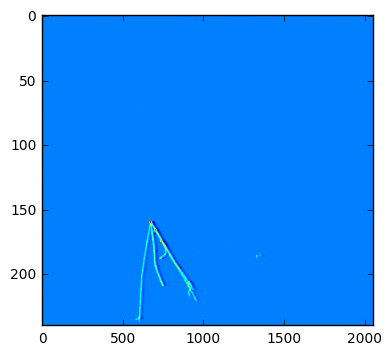

In [73]:
X,y=DownSample(images[1,0],2,240,4096)
print X.shape
fig, ax = plt.subplots()
ax.imshow(X)
ax.set_aspect(8)

In [74]:
np.sum(X)

279283.0